# Project Name: Visualizing Faces using Principal Component Analysis (PCA) on the Olivetti Faces Dataset

<b>Overview:</b>
This project focuses on introducing students to dimensionality reduction techniques, specifically Principal Component Analysis (PCA). Students will explore PCA's effectiveness in visualizing high-dimensional data by applying it to the Olivetti Faces dataset, enabling clear visualization and better understanding of facial data in lower-dimensional spaces.

You have:
<ul>
<li>Olivetti Faces dataset, consisting of grayscale images of 40 individuals with 10 different images each, captured under varying conditions.</li>
<li>Basic knowledge of Python, NumPy, scikit-learn, and matplotlib for visualization.</li>
</ul>

We will:

1. Preprocess and prepare the Olivetti Faces dataset for PCA, ensuring consistent scaling and normalization.
2. Implement PCA to reduce the high-dimensional facial data to two or three principal components for effective visualization.
3. Visualize the transformed data using scatter plots, interpret the principal components, and discuss insights into facial feature variations.

Goal:
Students will gain a practical understanding of PCA, its role in feature extraction and dimensionality reduction, and how it can be applied effectively for visualizing complex image data.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import base64
from IPython.display import display, HTML
import os

## Notebook utility

In [3]:
image_paths = ["img/PCA_gif.gif", "img/PCA1.png", "img/PCA2.png", "img/PCA3.png", "img/PCA4.webp", "img/PCA5.webp"]
image_size = [1000, 700, 700, 400, 600, 500]
images_html = []

mime_map = {
    ".png": "image/png",
    ".jpg": "image/jpeg",
    ".jpeg": "image/jpeg",
    ".gif": "image/gif",
    ".webp": "image/webp"
}

for i, path in enumerate(image_paths):
    ext = os.path.splitext(path)[1].lower()
    mime = mime_map.get(ext, "image/png")

    with open(path, "rb") as f:
        data = f.read()
    encoded = base64.b64encode(data).decode("utf-8")

    img_tag = f'<img src="data:{mime};base64,{encoded}" style="display: block; margin-left: auto; margin-right: auto; width: {image_size[i]}px;" /><br>'
    images_html.append(img_tag)

## Theoretical Background


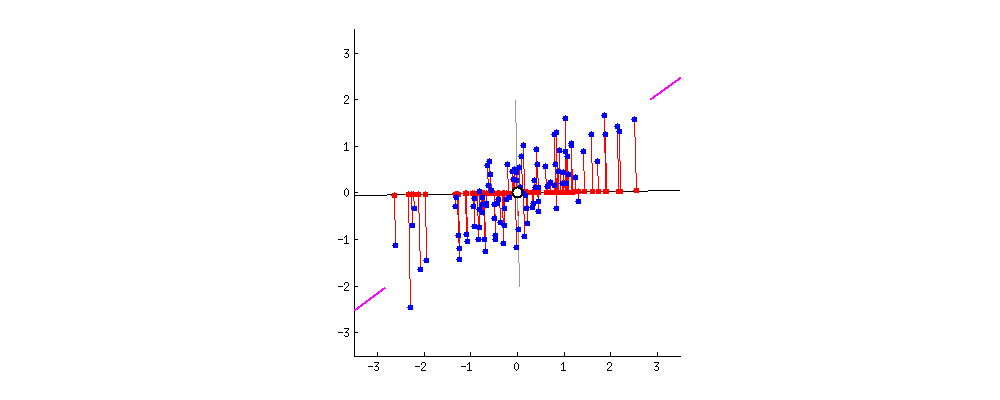

In [4]:
display(HTML(images_html[0]))


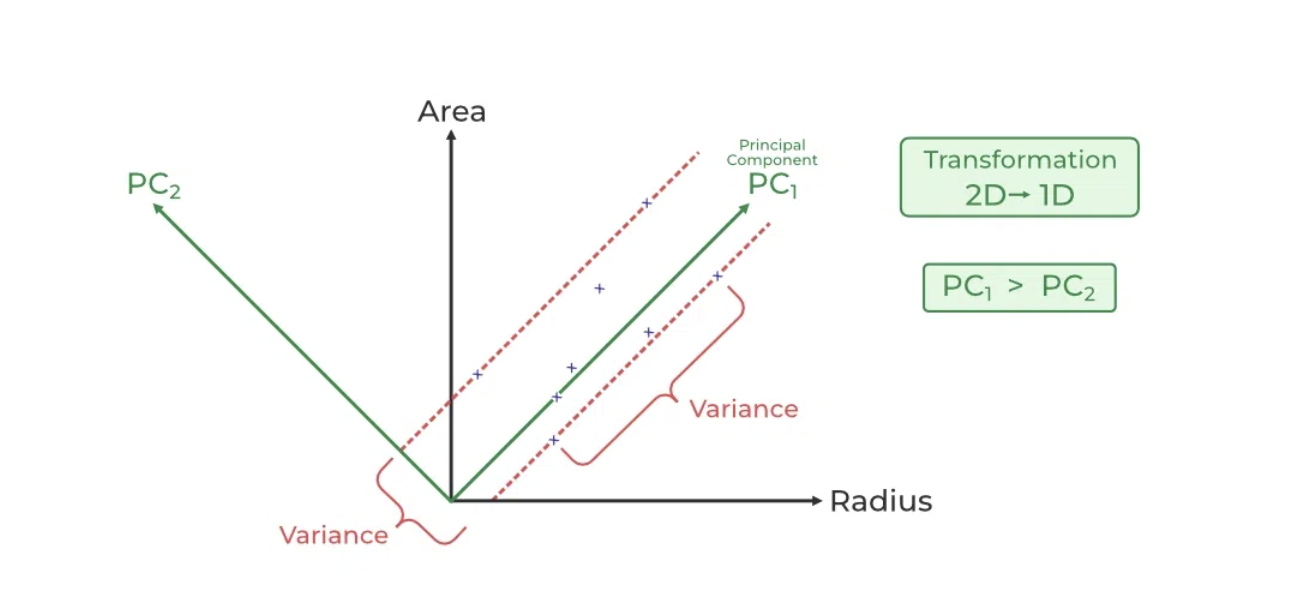

In [5]:
display(HTML(images_html[1]))


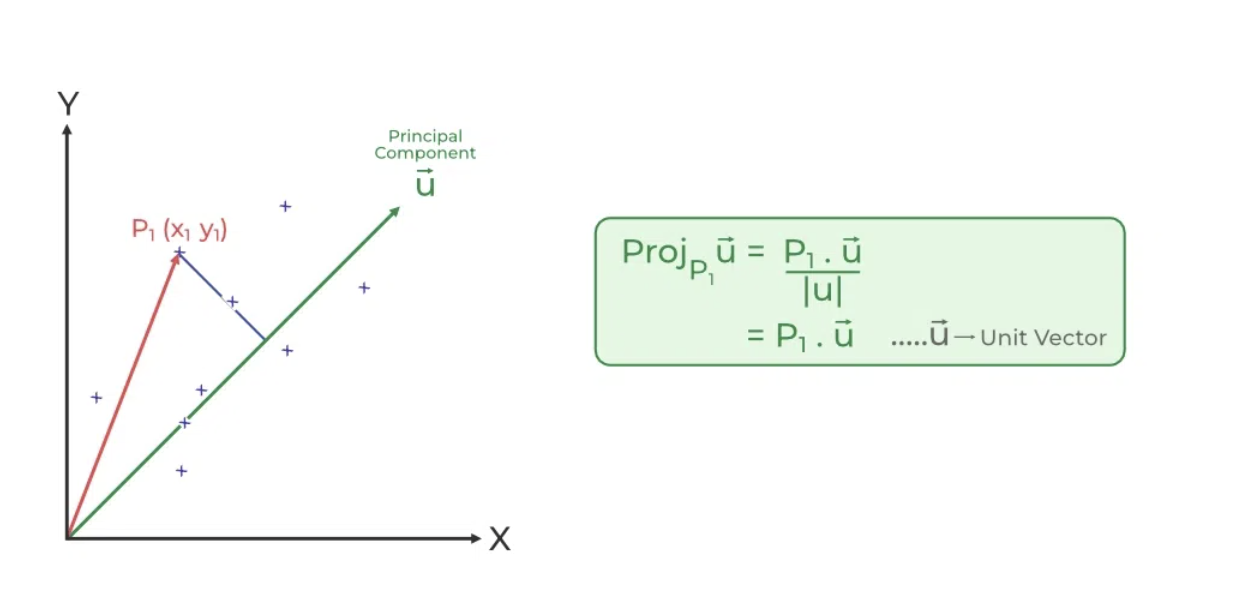

In [6]:
display(HTML(images_html[2]))

#### SVD Decomposition


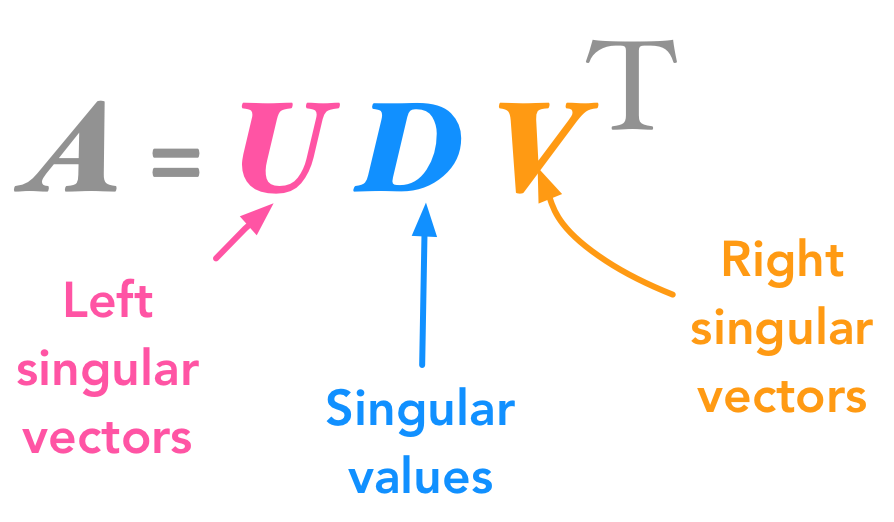

In [7]:
display(HTML(images_html[3]))


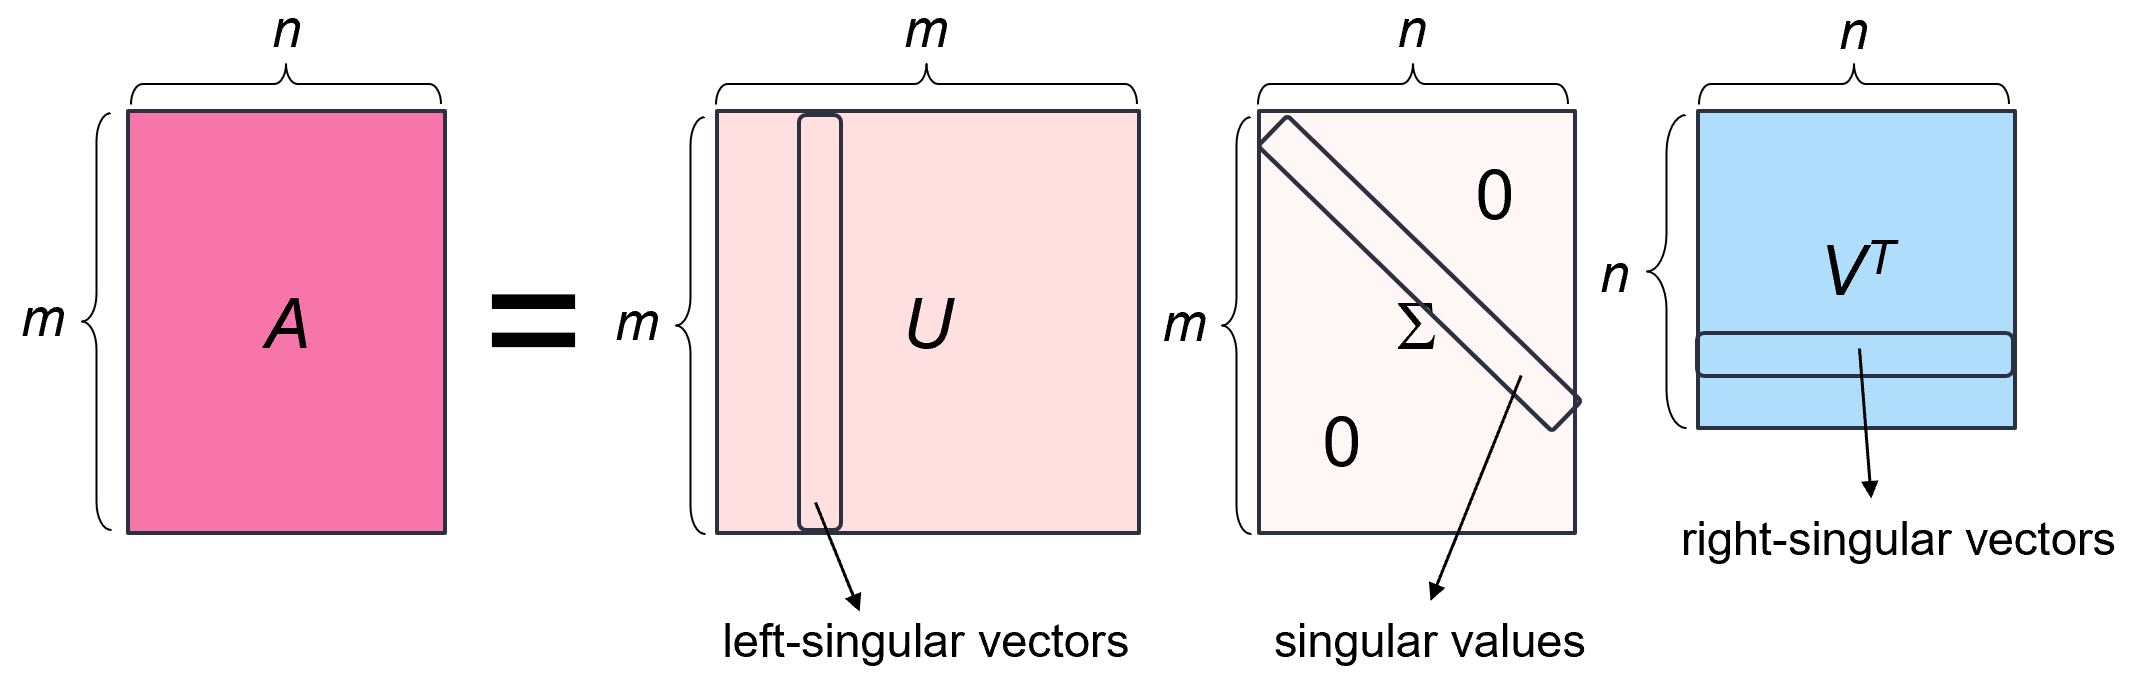

In [8]:
display(HTML(images_html[4]))

In [9]:
X = np.random.rand(100, 3)

In [10]:
X_centered = 0.01 * (X - X.mean(axis=0))

In [11]:
U, s, Vt = np.linalg.svd(X_centered)

In [12]:
c1 = Vt[0]
c2 = Vt[1]

In [13]:
W2 = Vt[:2].T
X2D = X_centered @ W2

#### EVD Decompostion


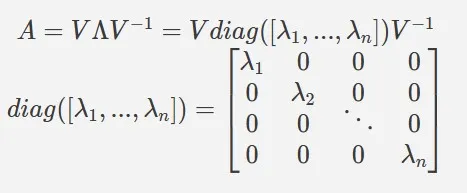

In [14]:
display(HTML(images_html[5]))

In [15]:
X = np.random.rand(100, 10)

In [16]:
X_covariance = 0.001 * (X.T @ X)

In [70]:
evalue, evect = np.linalg.eig(X_covariance)

## Loading and inspecting the Olivetti faces dataset

In [2]:
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
X = faces.data      
y = faces.target    
image_shape = faces.images[0].shape

In [3]:
print("There are {} images in the dataset".format(len(X)))
print("There are {} unique targets in the dataset".format(len(np.unique(y))))
print("Size of each image is {0}".format(image_shape))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is (64, 64)


#### a) Visualize a grid of sample faces

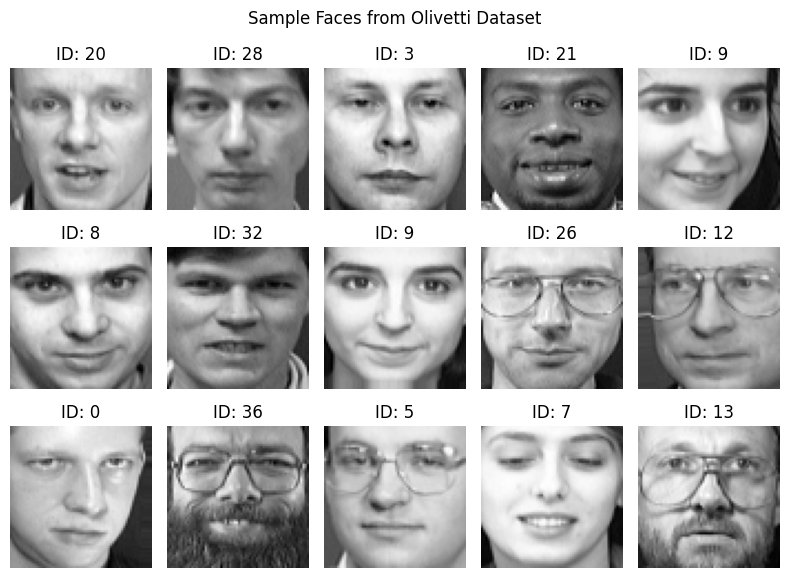

In [6]:
plt.figure(figsize=(8, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(faces.images[i], cmap='gray')
    plt.title(f'ID: {y[i]}')
    plt.axis('off')
plt.suptitle("Sample Faces from Olivetti Dataset")
plt.tight_layout()
plt.show()

#### b) Plot the distribution of images per person (class balance)

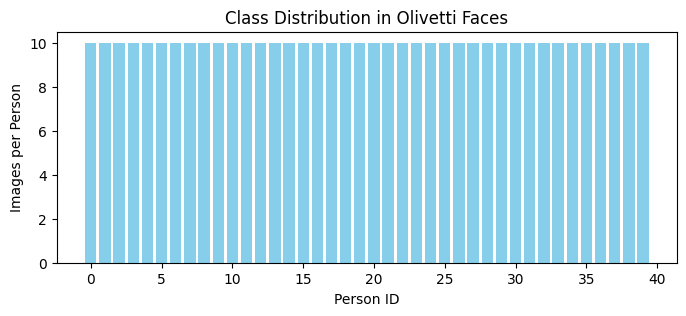

In [7]:
unique, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(8, 3))
plt.bar(unique, counts, color='skyblue')
plt.xlabel('Person ID')
plt.ylabel('Images per Person')
plt.title('Class Distribution in Olivetti Faces')
plt.show()

#### c) Visualize the mean face (average pixel value across all images)

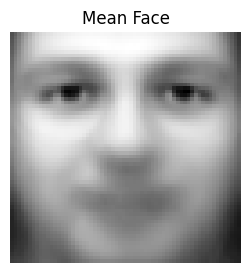

In [8]:
mean_face = X.mean(axis=0)
plt.figure(figsize=(3, 3))
plt.imshow(mean_face.reshape(image_shape), cmap='gray')
plt.title('Mean Face')
plt.axis('off')
plt.show()

#### d) Explore pixel intensity distribution

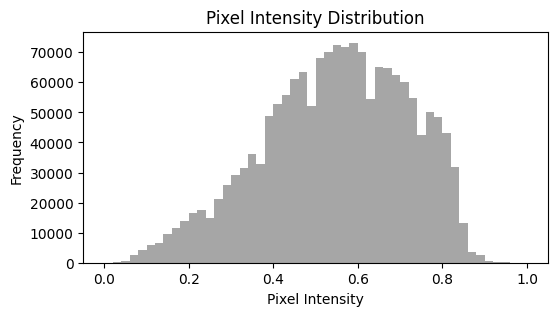

In [9]:
plt.figure(figsize=(6, 3))
plt.hist(X.ravel(), bins=50, color='gray', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution')
plt.show()

## Scree plot: Visualize variance explained by each principal component

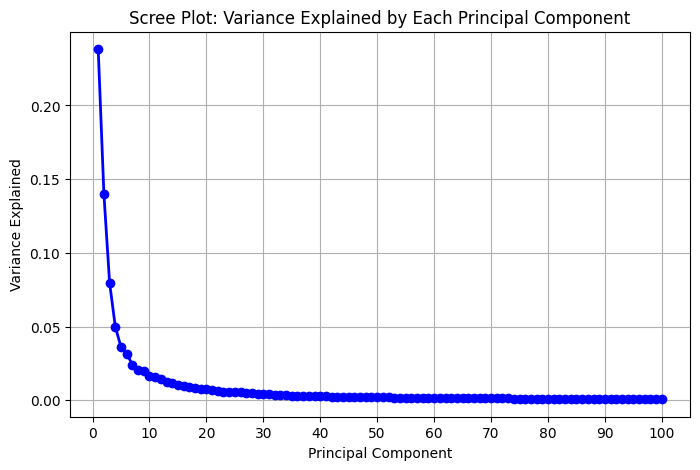

In [10]:
n_components_full = 100
pca_full = PCA(n_components=n_components_full, whiten=True, random_state=42)
X_pca_full = pca_full.fit_transform(X)

plt.figure(figsize=(8, 5))
components = np.arange(1, n_components_full + 1)
plt.plot(components, pca_full.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot: Variance Explained by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(np.arange(0, n_components_full + 1, 10))
plt.grid(True)
plt.show()

## Visualizing PCA

#### a) PCA in 2D space

In [12]:
pca = PCA(n_components=2, whiten=True, random_state=42)
X_pca = pca.fit_transform(X)
explained_var = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_var}")
print(f"Total variance explained by 2 components: {explained_var.sum():.2%}")

Explained variance by each component: [0.23812714 0.13993968]
Total variance explained by 2 components: 37.81%


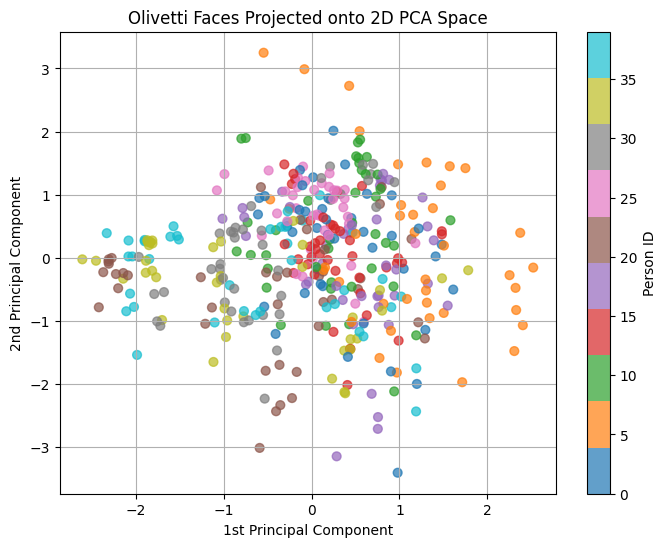

In [13]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7, s=40
)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Olivetti Faces Projected onto 2D PCA Space')
plt.colorbar(scatter, label='Person ID')
plt.grid(True)
plt.show()

#### b) PCA in 3D space

In [21]:
pca_3d = PCA(n_components=3, whiten=True, random_state=42)
X_pca_3d = pca_3d.fit_transform(X)
explained_var_3d = pca_3d.explained_variance_ratio_
total_var_3d = explained_var_3d.sum() * 100
print(f"Explained variance by each of 3D components: {explained_var_3d}")
print(f"Total variance explained by 3 components: {total_var_3d:.2f}%")

Explained variance by each of 3D components: [0.23812725 0.13993968 0.07968608]
Total variance explained by 3 components: 45.78%


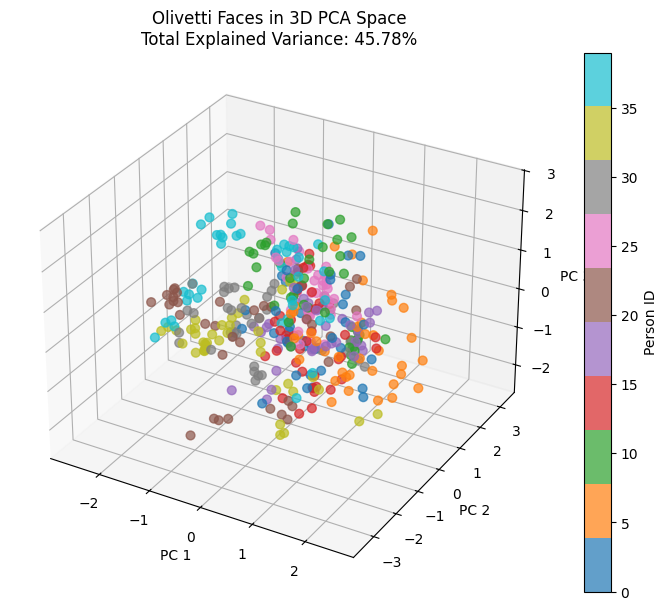

In [22]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=y, cmap='tab10', alpha=0.7, s=40
)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title(f'Olivetti Faces in 3D PCA Space\nTotal Explained Variance: {total_var_3d:.2f}%')
fig.colorbar(p, label='Person ID')
plt.show()

#### c) Reconstruct and visualize original faces from PCA components

In [3]:
n_components_recon = 50
pca_recon = PCA(n_components=n_components_recon, whiten=True, random_state=42)
X_pca_recon = pca_recon.fit_transform(X)
X_reconstructed = pca_recon.inverse_transform(X_pca_recon)

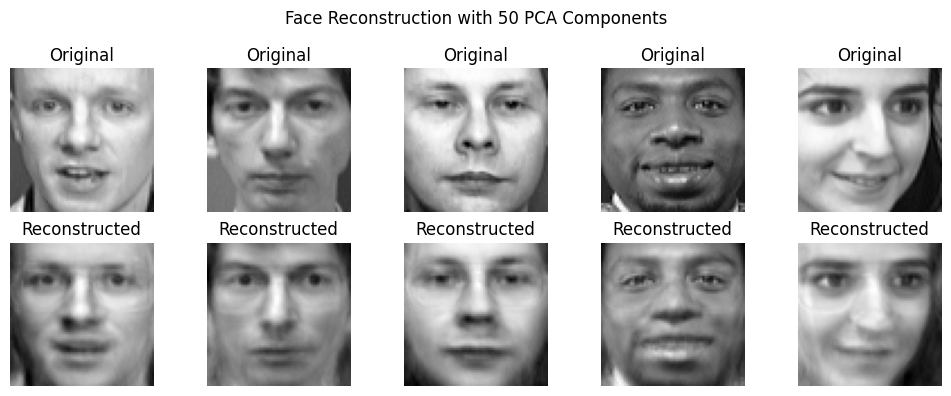

In [15]:
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(image_shape), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.subplot(2, 5, 5 + i + 1)
    plt.imshow(X_reconstructed[i].reshape(image_shape), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.suptitle(f"Face Reconstruction with {n_components_recon} PCA Components")
plt.tight_layout()
plt.show()

#### d) Visualize the first few "eigenfaces" (principal components as images)

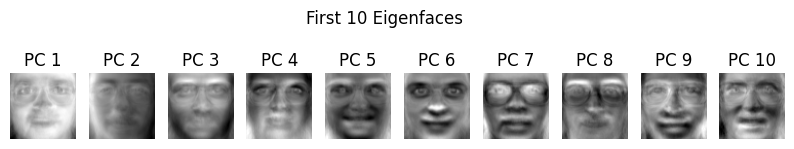

In [17]:
eigenfaces = pca_recon.components_.reshape((n_components_recon, *image_shape))
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f'PC {i+1}')
    plt.axis('off')
plt.suptitle("First 10 Eigenfaces")
plt.show()